In [2]:
import numpy as np
import scipy.integrate
import scipy.optimize

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

3334.9090693422518


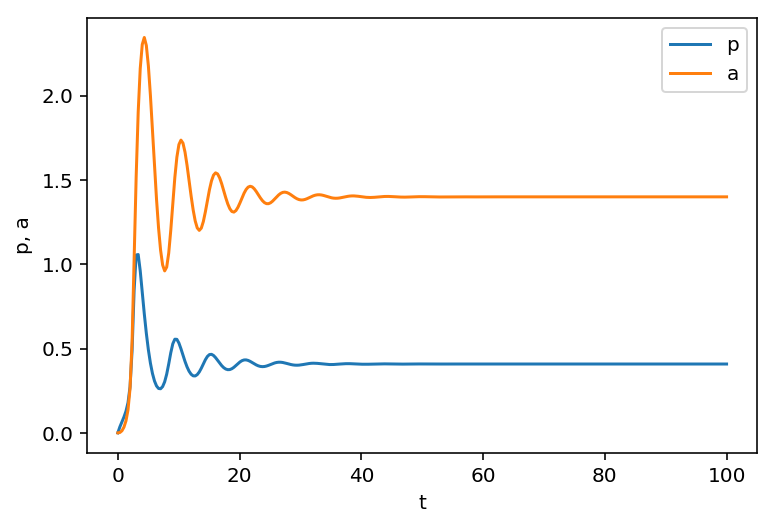

In [9]:
def f(pa, t, alpha1, alpha2, alpha3, alpha4, gamma):
    """Right hand side for toggle ODEs."""
    p, a = pa
    return np.array([-gamma*p + (1/(1 + a**2)) * (alpha1 + ((alpha2*p**2)/(1 + p**2))),
                     -a + (alpha4*p**2)/((alpha3)**2 + p**2)])

# Parameters
alpha1 = 0.125
alpha2 = 9.7
alpha3 = 0.5 
alpha4 = 3.5
gamma = 1.25
args = (alpha1, alpha2, alpha3, alpha4, gamma)

# Initial condition
pa0 = np.array([0, 0])

# Solve
t = np.linspace(0, 100, 300)
pa = scipy.integrate.odeint(f, pa0, t, args=args)

# Plot
plt.plot(t, pa)
plt.rcParams["image.cmap"] = "Set2"
plt.xlabel('t')
plt.ylabel('p, a')
plt.legend(('p', 'a'));

p0 = 0.04
dev2 = [((p - p0)**2) for p in t]
var = np.mean(dev2)
print(var)

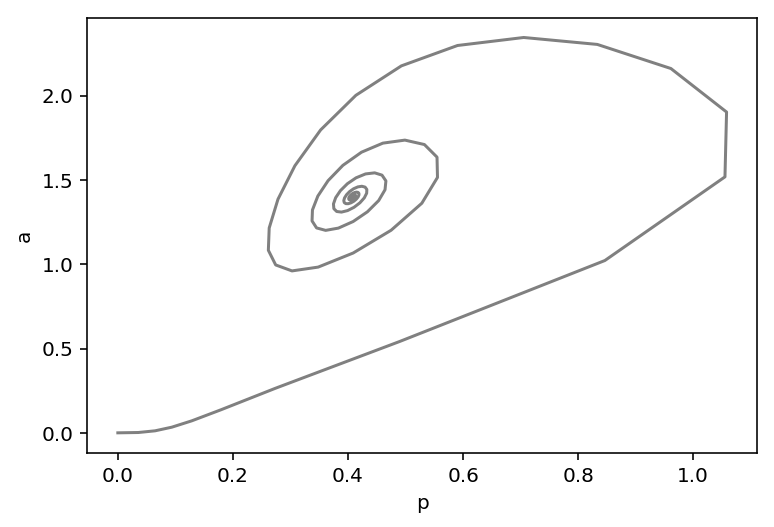

In [10]:
# Plot
plt.plot(pa[:,0], pa[:,1], color='gray')
plt.xlabel('p')
plt.ylabel('a');

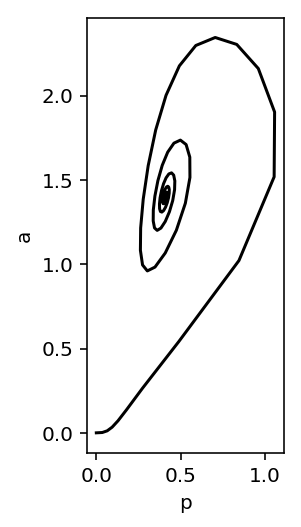

In [11]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('p')
ax.set_ylabel('a')
ax.set_aspect('equal')

for p0 in range(0,1):
    for a0 in range(0,1):
        pa = scipy.integrate.odeint(f, np.array([p0, a0]), t, args=args)
        ax.plot(*pa.transpose(), color='black');

In [12]:
def vector_field(ax, f, u_range, v_range, args=(), n_grid=100):
    
    # Set up u,v space
    u = np.linspace(u_range[0], u_range[1], n_grid)
    v = np.linspace(v_range[0], v_range[1], n_grid)
    uu, vv = np.meshgrid(u, v)

    # Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = f(np.array([uu[i,j], vv[i,j]]), None, *args)

    # Compute speed
    speed = np.sqrt(u_vel**2 + v_vel**2)

    # Make linewidths proportional to speed,
    # with minimal line width of 0.5 and max of 3
    lw = 0.5 + 2.5 * speed / speed.max()

    # Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel, linewidth=lw, arrowsize=1.2, 
                  density=1, color='lightseagreen')

    return ax

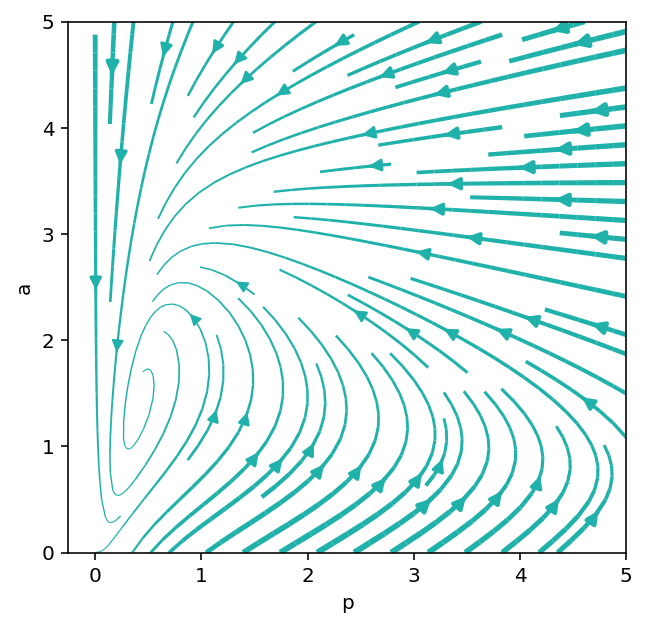

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (5, 10))
ax.set_xlabel('p')
ax.set_ylabel('a')
ax.set_aspect('equal')

ax = vector_field(ax, f, (0,5), (0, 5), args=args)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


[         -inf -121.28712142    0.62101676   14.04465268   15.66491956
   15.0181383    13.92267403   12.82510583   11.83982813   10.98754182
   10.26147659    9.64784698    9.13239689    8.70235551    8.34682865
    8.05667384    7.8242347     7.64306697    7.50769902    7.41343535
    7.35620056    7.33241723    7.33891125    7.37283877    7.43162987
    7.51294524    7.61464279    7.73475177    7.87145277    8.02306191
    8.18801848    8.36487482    8.55228819    8.74901381    8.95389894
    9.16587767    9.38396609    9.60725795    9.83492051   10.06619051
   10.30037041   10.53682464   10.77497596   11.01430196   11.25433161
   11.4946419    11.73485462   11.9746332    12.21367974   12.45173203
   12.68856088   12.92396739   13.1577805    13.38985459   13.62006728
   13.84831729   14.07452249   14.29861807   14.52055479   14.74029746
   14.9578234    15.17312111   15.38618903   15.59703434   15.80567196
   16.01212356   16.21641667   16.41858388   16.61866214   16.81669206
   17.

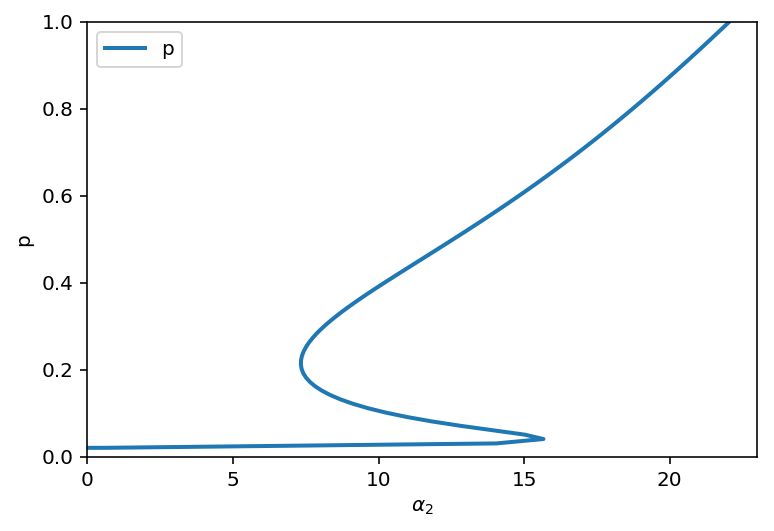

In [8]:
# Parameters
alpha1 = 0.025
alpha3 = 0.5
alpha4 = 3.5
gamma = 1.25

# Solve
p = np.linspace(0, 1, 100)
a = alpha4*p**2/(alpha3**2+p**2) #da/dt = 0; a(p)
alpha2 = (gamma*p*(1+(a)**2) - alpha1) * (1 + 1/(p**2)) #dp/dt = 0, alpha2(p)
print(alpha2)
print(p)

#Plot, set limits

fig, ax = plt.subplots()
line1 = ax.plot(alpha2, p, linewidth=2)

# Plot
plt.ylim(0,1)
plt.xlim(0,23)
plt.xlabel('$α_2$') #Error with using \alpha_2, could not fix
plt.ylabel('p')
plt.legend(('p', 'a'));

[-70.39239103  15.65311664  14.5104219   13.16539654  12.1005098
  11.25963768  10.58026748  10.01887888   9.54608501   9.14163679
   8.79118132   8.48426137   8.21306708   7.97163726   7.75533404
   7.56048808   7.38415306   7.22393196   7.07785176   6.94427132
   6.8218126    6.70930861   6.60576331   6.51032062   6.42223987
   6.34087646   6.2656663    6.1961132    6.13177868   6.07227349
   6.01725072   5.96639997   5.91944251   5.87612724   5.83622719
   5.79953659   5.76586841   5.73505214   5.70693198   5.68136522
   5.65822082   5.63737824   5.61872635   5.60216247   5.58759159
   5.57492564   5.5640828    5.55498699   5.54756733   5.54175769
   5.53749626   5.53472525   5.53339049   5.5334412    5.53482968
   5.53751107   5.54144318   5.54658624   5.55290273   5.56035725
   5.56891634   5.57854836   5.58922335   5.60091293   5.6135902
   5.62722961   5.64180693   5.65729912   5.67368427   5.69094153
   5.70905107   5.72799397   5.74775221   5.76830862   5.78964678
   5.8117510

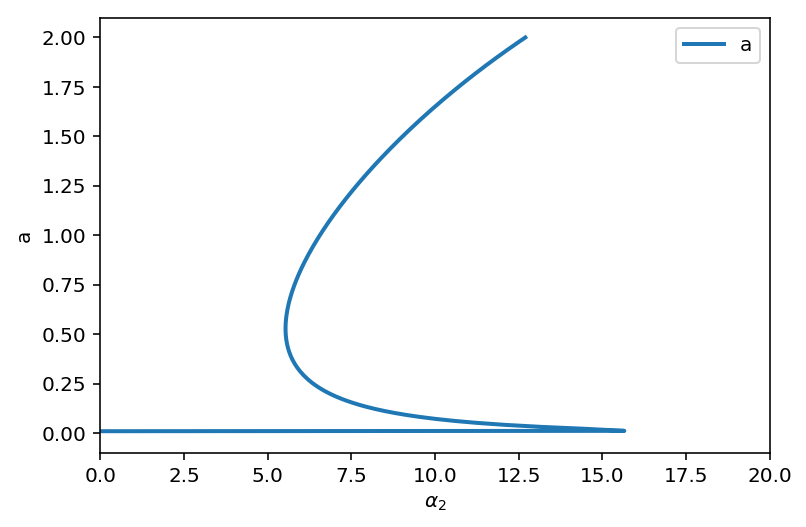

In [13]:
def y(a, alpha1, alpha3, alpha4, gamma):
    return (gamma*np.sqrt(alpha3/((alpha4/a) - 1))*(1+(a)**2) - alpha1) * (1 + 1/(np.sqrt(alpha3/((alpha4/a) - 1))**2))

alpha1 = 0.025
alpha3 = 0.5
alpha4 = 3.5
gamma = 1.25
args = (alpha1, alpha3, alpha4, gamma)

a = np.linspace(0.001, 2, 200)

#print(a)
print(y(a, alpha1, alpha3, alpha4, gamma))

fig, ax = plt.subplots()
plt.plot(y(a, alpha1, alpha3, alpha4, gamma), a, linewidth=2)
plt.xlim(0,20)
plt.xlabel('$α_2$')
plt.ylabel('a')
plt.legend(('a', 'a'));